Details on data can be found here in HADS_doc.pdf found in project page.

This analysis will focus on data from 1985, imported in next cell.

Some acronyms to keep in mind:

HH = household
AMI = area median income
FMR = fair market rent

A few cells below lists the variables to be cleaned-up. For each variable, the distribution of values will be looked into. Specifically, I will look for negative values and outliers.


In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
df = pd.read_csv("hads85.txt")


In [2]:
df.head()

,CONTROL,REGION,METRO,WEIGHT,ISTATUS,NUNITS,BEDRMS,VACANCY,BUILT,VALUE,...,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTIncRelAMICat,FMTMetro,FMTOwnRent,FMTRegion,FMTStatus,FMTStructureType,FMTZAdeq
0,'100006110249',3,7,2883.27,1,1,3,-9,81,-9,...,'4 60 - 80% AMI','4 60 - 80% AMI','4 60 - 80% AMI','4 60 - 80% AMI','-5','2 Renter','-5','1 Occupied','1 Single Family','1 Adequate'
1,'100007130148',3,1,2785.89,1,16,2,-9,81,-9,...,'4 60 - 80% AMI','4 60 - 80% AMI','4 60 - 80% AMI','3 50 - 60% AMI','Central City','2 Renter','-5','1 Occupied','3 5-19 units','1 Adequate'
2,'100008700141',4,6,2450.53,3,8,2,1,84,-9,...,'5 80 - 100% AMI','5 80 - 100% AMI','5 80 - 100% AMI','.','-5','2 Renter','West','3 Vacant','3 5-19 units','1 Adequate'
3,'100014110140',3,7,2306.52,1,2,2,-9,85,-9,...,'4 60 - 80% AMI','4 60 - 80% AMI','4 60 - 80% AMI','4 60 - 80% AMI','-5','2 Renter','-5','1 Occupied','2 2-4 units','1 Adequate'
4,'100014350142',1,3,2504.35,1,1,3,-9,84,160000,...,'7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','-5','1 Owner','-5','1 Occupied','1 Single Family','1 Adequate'


There are 96 variables in a given file. The following variables will be analyzed. If necessary, more variables can be considered later in the analysis.

AGE or age1                   = Age of head of household
ASSISTED                      = Assisted Housing
BEDRMS                        = # of bedrooms in unit
BUILT                         = Year unit was built
BURDEN                        = Housing cost as a fraction of income
COSTMED                       = Housing cost at Median interest
COSTMedRELAMICAT              = CostMed Relative to Median Income (Category)
COSTMedRELAMIPCT              = CostMed Relative to Median Income (Percent)
FMR                           = Fair market rent (average)
FMTASSISTED                   = Assisted Housing
FMTMETRO or FMTMETRO3         = CENTRAL CITY/SUBURBAN STATUS
FMTOWNRENT                    = Owner/Renter Status (adjusted)
FMTREGION                     = Census Region
FMTSTATUS                     = Occupancy Status
FMTSTRUCTURETYPE              = Structure Type
INCRELAMICAT                  = HH Income relative to AMI (category)
INCRELAMIPCT                  = HH Income relative to AMI (percent)
IPOV                          = Poverty Income
LMED                          = Area median income (average)
NUNITS                        = # of units in building
OTHERCOST                     = Insurance, condo, land rent, other mobile home fees
OWNRENT                       = Tenure (adjusted)
PER                           = # of persons in household
ROOMS                         = # of rooms in unit
TENURE                        = Owner/renter status of unit
TOTSAL                        = Total Wage Income
UTILITY                       = Monthly utility cost
VACANCY                       = Vacancy status
VALUE                         = Current market value of unit
ZINC2                         = Household income
ZSMHC                         = Monthly housing costs


In [3]:
col_list = ['AGE']
hist = df.hist(column=col_list, bins=10)

AGE1 has several negative values. The positive values look distributed as a Gaussian. Viewing the distribution below of the negative values

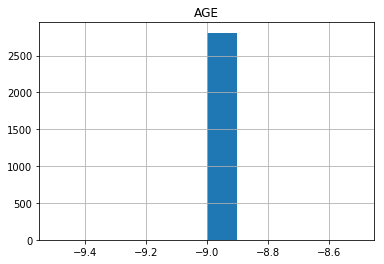

In [4]:
df_neg = df.loc[df['AGE'] < 0]
col_list = ['AGE']
hist = df_neg.hist(column=col_list, bins=10)

The negatives fall under one bin. Likely the age was not availabe for these records. Therefore setting them to NaN below.

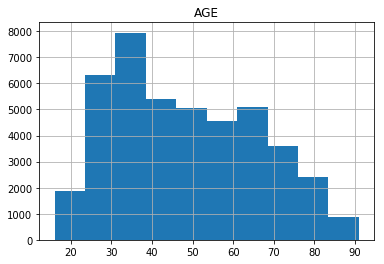

In [5]:
df.loc[df['AGE'] < 0, 'AGE'] = np.NaN
col_list = ['AGE']
hist = df.hist(column=col_list, bins=10)

In [6]:
df['Assisted'].value_counts()

0    43637
1     2277
Name: Assisted, dtype: int64

In [7]:
df['FMTAssisted'].value_counts()

'0 Not Assisted'    43637
'1 Assisted'         2277
Name: FMTAssisted, dtype: int64

In [8]:
df['BEDRMS'].value_counts()

3     17643
2     14684
1      6301
4      5313
5       940
0       795
6       178
7        32
10       20
8         7
9         1
Name: BEDRMS, dtype: int64

In [9]:
df['BUILT'].value_counts()

4     7896
5     6893
3     5445
9     5254
6     4123
2     3958
7     3198
8     2885
1     2504
84     804
83     685
80     630
81     619
85     565
82     455
Name: BUILT, dtype: int64

In [10]:
df['FMTBuilt'].value_counts()

'1960-1979'    19803
'-5'           11337
'1940-1959'    11016
'1980-1989'     3758
Name: FMTBuilt, dtype: int64

In [11]:
df.loc[df['FMTBuilt'].str.contains('-5'), 'FMTBuilt'] = 'not_defined'
df['FMTBuilt'].value_counts()

'1960-1979'    19803
not_defined    11337
'1940-1959'    11016
'1980-1989'     3758
Name: FMTBuilt, dtype: int64

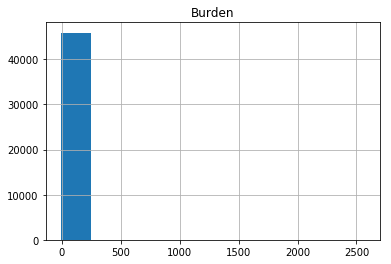

In [12]:
hist = df.hist(column='Burden', bins=10)

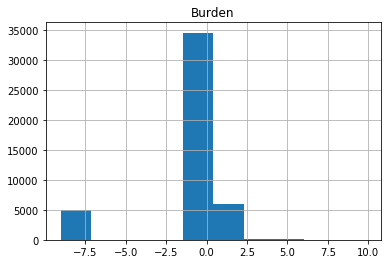

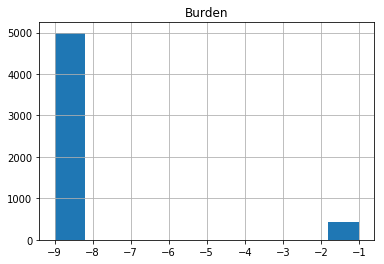

In [13]:
hist = df.loc[df['Burden'] < 10].hist(column='Burden',bins=10)
hist = df.loc[df['Burden'] < 0 ].hist(column='Burden',bins=10)


In [14]:
print(df.loc[df['Burden'] == -9, 'Burden'].count())
print(df.loc[df['Burden'] == -1, 'Burden'].count())

4998
434


BURDEN is a continuous variable. Setting the 4998 values of -9 to NaN as these seem to be unavailable. Will assume that BURDEN set to -1 are households with no income (the ratio of cost to income would be infinite). There are also households with BURDEN higher than 1. Therefore if BURDEN is -1 or is 10 or more, the BURDEN is to be set at 10.

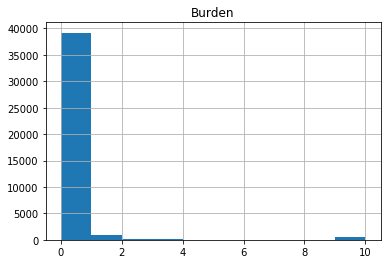

In [15]:
df.loc[df['Burden'] == -9, 'Burden'] = np.NaN
df.loc[df['Burden'] == -1, 'Burden'] = 10
df.loc[df['Burden']  > 10, 'Burden'] = 10
hist = df.hist(column = 'Burden', bins = 10)

0
0


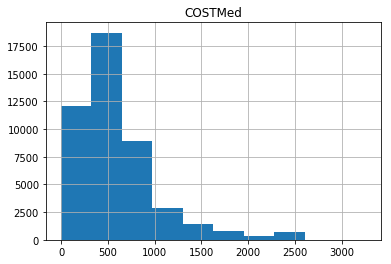

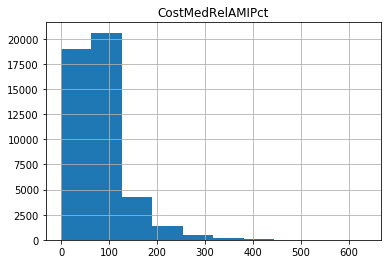

In [19]:
hist = df.hist(column='COSTMed',bins=10)
print(df.loc[df['COSTMed'] < 0,'COSTMed'].count())

hist = df.hist(column='CostMedRelAMIPct',bins=10)
print(df.loc[df['CostMedRelAMIPct'] < 0,'CostMedRelAMIPct'].count())


In [22]:
print(df['CostMedRelAMICat'].value_counts())
print(df['FMTCOSTMEDRELAMICAT'].value_counts())

4    9138
2    7648
7    7314
5    7291
3    5344
1    4761
6    4418
Name: CostMedRelAMICat, dtype: int64
'4 60 - 80% AMI'      9138
'2 30 - 50% AMI'      7648
'7 120% AMI +'        7314
'5 80 - 100% AMI'     7291
'3 50 - 60% AMI'      5344
'1 LTE 30% AMI'       4761
'6 100 - 120% AMI'    4418
Name: FMTCOSTMEDRELAMICAT, dtype: int64


0


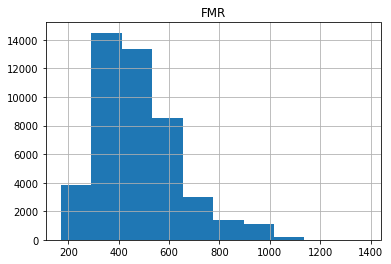

In [23]:
hist = df.hist(column='FMR', bins=10)
print(df.loc[df['FMR'] < 0,'FMR'].count())

In [25]:
df['FMTAssisted'].value_counts()

'0 Not Assisted'    43637
'1 Assisted'         2277
Name: FMTAssisted, dtype: int64

In [27]:
df['FMTMetro'].value_counts()

'-5'              29694
'Central City'    16220
Name: FMTMetro, dtype: int64

Most values have -5 value which is not defined in documentation. Dropping this column.

In [29]:
df['FMTOwnRent'].value_counts()

'1 Owner'     28536
'2 Renter'    17378
Name: FMTOwnRent, dtype: int64

In [30]:
df['FMTRegion'].value_counts()

'-5'      36663
'West'     9251
Name: FMTRegion, dtype: int64

Most values have -5 value which is not defined in documentation. Dropping this column.

In [32]:
df['FMTStatus'].value_counts()

'1 Occupied'    43104
'3 Vacant'       2810
Name: FMTStatus, dtype: int64

In [34]:
df['FMTStructureType'].value_counts()

'1 Single Family'    30213
'2 2-4 units'         5613
'3 5-19 units'        4702
'6 Mobile Home'       2140
'5 50+ units'         1706
'4 20-49 units'       1540
Name: FMTStructureType, dtype: int64

In [36]:
print(df['IncRelAMICat'].value_counts())
print(df['FMTIncRelAMICat'].value_counts())

 7    14961
 1     6105
 2     5273
 5     5103
 4     4644
 6     4385
-9     2810
 3     2633
Name: IncRelAMICat, dtype: int64
'7 120% AMI +'        14961
'1 LTE 30% AMI'        6105
'2 30 - 50% AMI'       5273
'5 80 - 100% AMI'      5103
'4 60 - 80% AMI'       4644
'6 100 - 120% AMI'     4385
'.'                    2810
'3 50 - 60% AMI'       2633
Name: FMTIncRelAMICat, dtype: int64


Will use FMTIncRelAMICat, dropping IncRelAMICat

In [37]:
df.loc[df['FMTIncRelAMICat'].str.contains('.', regex=False), 'FMTIncRelAMICat'] = '\'not_defined\''
print(df['FMTIncRelAMICat'].value_counts())

'7 120% AMI +'        14961
'1 LTE 30% AMI'        6105
'2 30 - 50% AMI'       5273
'5 80 - 100% AMI'      5103
'4 60 - 80% AMI'       4644
'6 100 - 120% AMI'     4385
'not_defined'          2810
'3 50 - 60% AMI'       2633
Name: FMTIncRelAMICat, dtype: int64


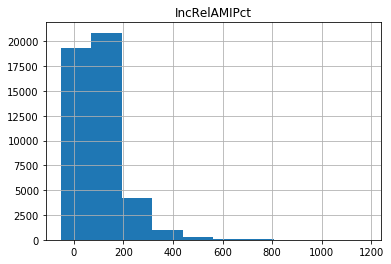

In [41]:
hist = df.hist(column='IncRelAMIPct', bins=10)

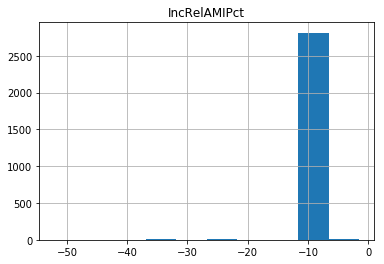

In [42]:
hist = df.loc[df['IncRelAMIPct'] < 0, :].hist(column='IncRelAMIPct', bins=10)

In [43]:
df.loc[df['IncRelAMIPct'] < 0, 'IncRelAMIPct'].value_counts()

-9.000000     2810
-35.118505       1
-50.600245       1
-46.579117       1
-10.119037       1
-10.544608       1
-34.897978       1
-23.702621       1
-31.851195       1
-23.593381       1
-41.829850       1
-11.312831       1
-30.357111       1
-30.339355       1
-31.223620       1
-27.527829       1
-22.593925       1
-1.520707        1
-15.499424       1
-34.408774       1
-32.460979       1
-46.819267       1
-4.055218        1
-12.014301       1
-38.617396       1
-52.035899       1
-1.531370        1
-44.992101       1
-40.966859       1
-4.375745        1
-10.162372       1
-26.336245       1
-2.248675        1
-22.031693       1
Name: IncRelAMIPct, dtype: int64

INCRELAMIPCT has 2810 values at -9. These likely represent not defined values. Setting them to NaN. There are is also a distribtion of negative values. Likely these represent incomes for households in financial distress. To be set to 0.

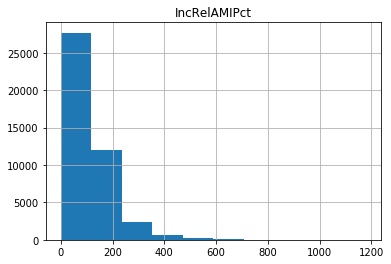

In [45]:
df.loc[df['IncRelAMIPct'] == -9, 'IncRelAMIPct'] = np.NaN
df.loc[df['IncRelAMIPct'] < 0  , 'IncRelAMIPct'] = 0
hist = df.hist(column='IncRelAMIPct', bins=10)

0

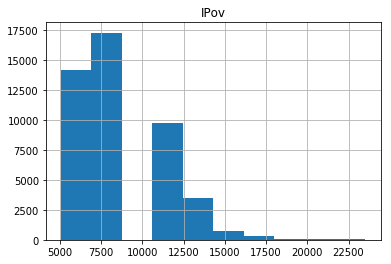

In [49]:
col_list = ['IPov']
hist = df.hist(column=col_list, bins=10)
df.loc[df['IPov'] < 0, 'IPov'].count()

0

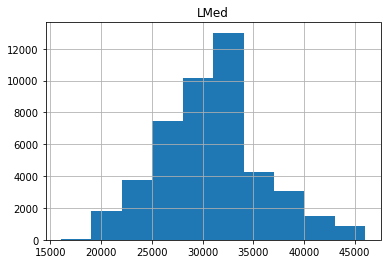

In [51]:
hist = df.hist(column = 'LMed', bins = 10)
df.loc[df['LMed'] < 0, 'LMed'].count()

In [52]:
columns = ['NUNITS']
for column in columns:
    print(df[column].value_counts())

1      32344
2       3080
4       1586
8       1074
3        956
101      909
6        709
12       658
16       521
10       373
5        324
24       212
20       196
7        187
9        172
11       158
18       156
14       152
36       108
30        98
48        79
15        79
40        74
60        69
17        66
21        54
42        54
32        54
28        52
25        47
13        42
100       40
54        39
23        39
22        38
26        38
35        37
38        37
96        35
39        34
34        34
50        32
72        31
33        31
19        31
44        31
90        30
27        29
70        26
41        25
80        24
62        24
31        23
97        22
29        22
65        20
45        20
56        19
46        19
53        18
55        17
69        17
37        17
57        16
64        16
67        16
47        16
79        15
84        15
51        15
94        13
92        13
98        12
63        12
49        12
73        11
66        11

In [53]:
# setting new categories for NUNITS
for index, row in df.iterrows():
    if   row['NUNITS'] > 100:
        df.loc[index, 'NUNITS'] = 'gt 100'
    elif row['NUNITS'] > 10:
        df.loc[index, 'NUNITS'] = 'gt 10'
    elif row['NUNITS'] > 1:
        df.loc[index, 'NUNITS'] = 'gt 1'
    elif row['NUNITS'] == -7:
        df.loc[index, 'NUNITS'] = 'not defined'
        


In [54]:
df['NUNITS'].value_counts()

1         32344
gt 1       8461
gt 10      4200
gt 100      909
Name: NUNITS, dtype: int64

0

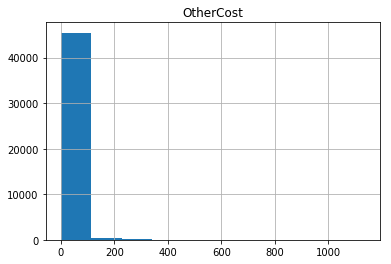

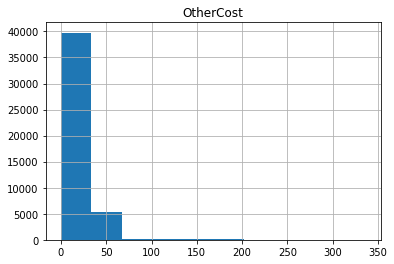

In [56]:
hist = df.hist(column='OtherCost',bins=10)
hist = df.loc[df['OtherCost'] < 500].hist(column='OtherCost',bins=10)
df.loc[df['OtherCost'] < 0, 'OtherCost'].count()

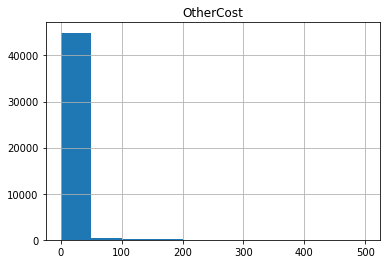

In [58]:
df.loc[df['OtherCost'] > 500, 'OtherCost'] = 500
hist = df.hist(column='OtherCost', bins=10)

In [60]:
df['OwnRent'].value_counts()

1    28536
2    17378
Name: OwnRent, dtype: int64

In [61]:
df['PER'].value_counts()

 2     13906
 1     10017
 3      7535
 4      6808
 5      3092
-9      2810
 6      1074
 7       374
 8       172
 9        63
 10       33
 11       16
 12        6
 14        4
 15        2
 13        2
Name: PER, dtype: int64

If number of persons per unit is greater than 8, setting value to '9 or more'. If PER is negative, setting to not_defined

In [62]:
df.loc[df['PER'] > 8, 'PER'] = '9 or more'
df.loc[df['PER'] == -9, 'PER'] = 'not_defined'
df['PER'].value_counts()

2              13906
1              10017
3               7535
4               6808
5               3092
not_defined     2810
6               1074
7                374
8                172
9 or more        126
Name: PER, dtype: int64

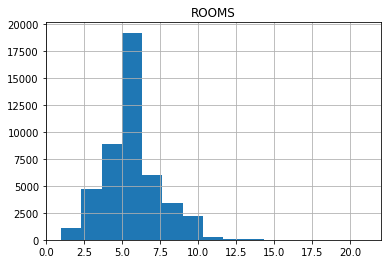

In [63]:
df['ROOMS'].value_counts()
hist = df.hist(column='ROOMS', bins=15)

In [64]:
df['TENURE'].value_counts()

 1    27664
 2    14490
-9     2810
 3      950
Name: TENURE, dtype: int64

In [66]:
df.loc[df['TENURE'] == -9, 'TENURE'] = 'not_defined'
df['TENURE'].value_counts()

1              27664
2              14490
not_defined     2810
3                950
Name: TENURE, dtype: int64

-9    2810
Name: TotSal, dtype: int64

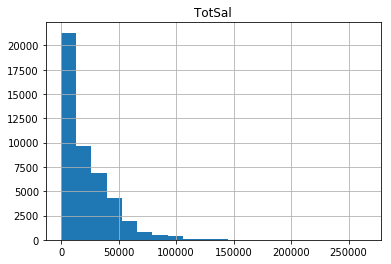

In [69]:
hist = df.hist(column='TotSal', bins=20)
df.loc[df['TotSal'] < 0, 'TotSal'].value_counts()

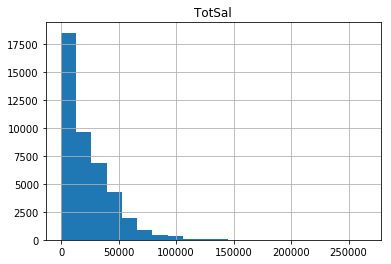

In [71]:
df.loc[df['TotSal'] == -9, 'TotSal'] = np.NaN
hist = df.hist(column='TotSal', bins=20)

0

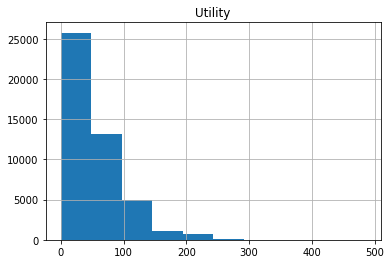

In [74]:
hist = df.hist(column='Utility', bins=10)
(df['Utility'] < 0).sum()

In [75]:
df['VACANCY'].value_counts()

-9    43104
 1     1590
 3      604
 5      268
 2      183
 4      165
Name: VACANCY, dtype: int64

VACANCY has most values set at -9. Not sure what the other values mean. There is no explanation in documentation. Dropping this variable.

-9    17378
Name: VALUE, dtype: int64

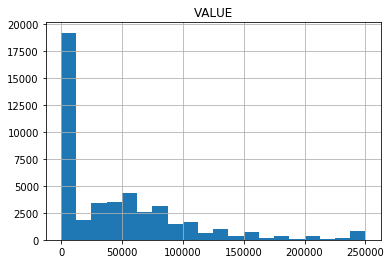

In [77]:
hist = df.hist(column='VALUE', bins=20)
df.loc[df['VALUE'] < 0, 'VALUE'].value_counts()

Setting value of -9 to NaN

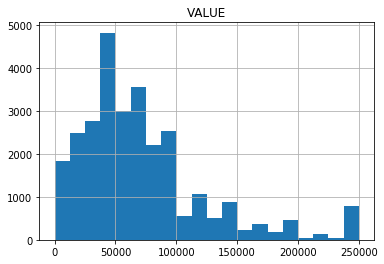

In [78]:
df.loc[df['VALUE'] == -9, 'VALUE'] = np.NaN
hist = df.hist(column='VALUE', bins=20)

-9        2810
-10001      12
-3000        4
-6000        3
-4000        2
-400         2
-5000        2
-7000        2
-6801        1
-1000        1
-9000        1
-8800        1
-1104        1
-4700        1
-500         1
-384         1
-330         1
-1100        1
-6101        1
-3201        1
-1900        1
-2000        1
-6250        1
-8501        1
-9001        1
-5001        1
-9601        1
-3600        1
-1601        1
-8000        1
-6001        1
-8400        1
Name: ZINC2, dtype: int64

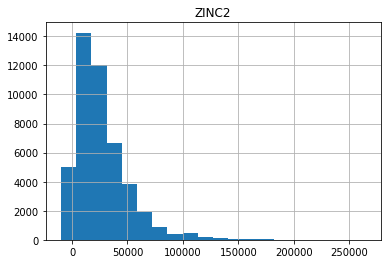

In [80]:
hist = df.hist(column='ZINC2', bins=20)
df.loc[df['ZINC2'] < 0, 'ZINC2'].value_counts()

Values of -9 setting to NaN. Other negative values setting to 0 as these likely represent households in financial distress

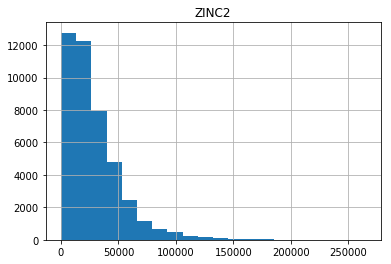

In [81]:
df.loc[df['ZINC2'] == -9, 'ZINC2' ] = np.NaN
df.loc[df['ZINC2'] < 0, 'ZINC2' ] = 0
hist = df.hist(column='ZINC2', bins=20)

-9    3261
Name: ZSMHC, dtype: int64

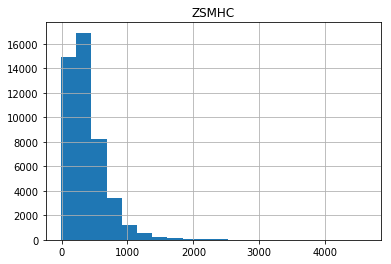

In [83]:
hist = df.hist(column='ZSMHC', bins=20)
df.loc[df['ZSMHC'] < 0, 'ZSMHC'].value_counts()

In [ ]:
Values of -9 setting to NaN.

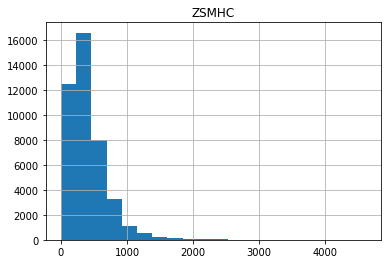

In [84]:
df.loc[df['ZSMHC'] == -9, 'ZSMHC' ] = np.NaN
hist = df.hist(column='ZSMHC', bins=20)